## Programación defensiva, pruebas y depuración


## Contenidos

> "*Always code as if the guy who ends up maintaining your code will be a violent psychopath who knows where you live.*" **John Woods**

- Programación defensiva
  - Sentencias de excepción y manejo de errores. 
  - Pruebas
  - Depuración

***
## Programación defensiva

- [Programación defensiva](https://es.wikipedia.org/wiki/Programaci%C3%B3n_defensiva)

### Diseño modular

In [1]:
def input_compute():
    a = int(input("Ingresa a: "))
    b = int(input("Ingresa b: "))
    
    c = 2*a + 5*b
    z, t = 0, 0
    while t < c:
        if t % 2 == 0: 
            z += t
        t += 1
    return z

In [2]:
input_compute()

30

In [5]:
def user_input(): 
    """
    Toda la entrada del usuario y devuelve (a,b) numéricas.
    """
    a = int(input("Ingresa a: "))
    b = int(input("Ingresa b: "))
    return a, b

def compute(a: int, b:int):
    """
    Recibe a y b y computa la suma de números pares hasta 2a + 5b
    """
    c = 2*a + 5*b
    z, t = 0, 0
    while t < c:
        if t % 2 == 0: 
            z += t
        t += 1
    return z

In [4]:
a, b = user_input()
compute(a,b)

30

### Errores y excepciones

- [Errores y excepciones](https://docs.python.org/3/tutorial/errors.html)

Cuando la ejecución de un procedimiento alcanza una condición no esperada se genera una **excepción**. A continuación, vemos algunos ejemplos de excepciones: 

In [1]:
test = [1,2,3]
test[4]

IndexError: list index out of range

In [3]:
int("Oneros")

ValueError: invalid literal for int() with base 10: 'Oneros'

In [4]:
'3' / 4

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [5]:
len([1,2,3]

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_16288/911138559.py, line 1)

### Manejo de excepciones

Algunas de estas excepciones pueden terminar el programa de manera inesperada. Sin embargo, si son manejadas adecuadamente, se puede indicar al usuario que algo está mal, o que el programa continúe su ejecución. Una forma de hacer esto es utilizar la sentencia `try-except`: 

In [16]:
try:
    a = int(input("Tell me one number:"))
    b = int(input("Tell me another number:"))
    print(a/b)
except ZeroDivisionError:
    print("Warning: b cannot be 0. Assigned b = 1 in division.")
    print(a/1)
except:
    print("Bug in user input.")

Bug in user input.


In [18]:
try:
    a = int(input("Tell me one number: "))
    b = int(input("Tell me another number: "))
    print("a/b = ", a/b)
    print("a+b = ", a+b)
except ValueError:
    print("Could not convert to a number.")
except ZeroDivisionError:
    print("Can't divide by zero")
except:
    print("Something went very wrong.")

Could not convert to a number.


In [7]:
try:
    a = int(input("Tell me one number: "))
    b = int(input("Tell me another number: "))
    print("a/b = ", a/b)
    print("a+b = ", a+b)
except ValueError:
    print("Could not convert to a number.")
except ZeroDivisionError:
    print("Can't divide by zero")
except:
    print("Something went very wrong.")
else:
    print("Yay! No exceptions")
finally:
    print("Bye!")

a/b =  2.0
a+b =  3
Yay! No exceptions
Bye!


### ¿Qué hacer con las excepciones? 

In [30]:
import random 

def random_accum(s = 20):
    accum = 0
    for _ in range(s): 
        t = random.random()
        accum += t
        if accum > 10: 
            raise Exception("Este acumulador se desconotroló")
    return accum

random_accum()

Exception: Este acumulador se desconotroló

### Otros ejemplos

- En este ejemplo, inputamos un valor en caso de una excepción. Dependiendo de la aplicación, es una aproximación válida para manejar las excepciones y continuar con la ejecución del programa.

In [31]:
def get_ratios(L1, L2):
    """ 
    Assumes: L1, L2 lists of equal length of numbers
    Returns: a list containing L1[i]/L2[i] 
    """
    ratios = []
    for index in range(len(L1)):
        try:
            ratios.append(L1[index]/L2[index])
        except ZeroDivisionError:
            print("Warning: division by zero. Assigned nan.")
            ratios.append(float('nan')) #nan = not a number
        except:
            raise ValueError('called with bad arguments')
    return ratios

In [32]:
get_ratios([1,2,3], [2,3,0])

[0.5, 0.6666666666666666, nan]

Esta también es la aproximación de algunas librerías de uso común.

In [36]:
import numpy as np

x = np.arange(10)
np.log(x)

C:\Users\Rodrigo\AppData\Local\Temp/ipykernel_22856/179031708.py:4: RuntimeWarning: divide by zero encountered in log
  np.log(x)


array([      -inf, 0.        , 0.69314718, 1.09861229, 1.38629436,
       1.60943791, 1.79175947, 1.94591015, 2.07944154, 2.19722458])

### Assert

- Otro ejemplo de programación defensiva.
- Podemos utilizar `assert` si queremos estar **seguros** que se verifican supuestos en el cómputo.

In [40]:
def avg(grades):
    """ grades : grades list """
    assert len(grades) != 0, 'no grades data'
    return sum(grades)/len(grades)

avg([1,2,3])

2.0

In [42]:
avg([1])

1.0

***
## Pruebas

### Pruebas de caja negra

In [26]:
def sqrt(x, eps, show_status = False):
    ''' Assumes x, eps floats, x >= 0, eps > 0
    Returns res such that x-eps <= res*res <= x+eps '''
    if x == 0: return 0
    res = x/2
    for i in range(100):
        if show_status: print(f"iter: {i}\t res= {res}")
        x_prev = res 
        res = res - (res**2 - x)/(2*res)
        if abs(res - x_prev) < eps: 
            break 
    
    return res


In [28]:
sqrt(2, 0.01, show_status=True)

iter: 0	 res= 1.0
iter: 1	 res= 1.5
iter: 2	 res= 1.4166666666666667


1.4142156862745099

A continuación vemos un ejemplo utilizando el paquete `ipytest`:

In [7]:
import ipytest
ipytest.autoconfig()

In [31]:
%%ipytest 

import math 

x_vals_easy = [0, 25, 0.05, 2, 2]
eps_vals_easy = [0.0001, 0.0001, 0.0001, 0.0001]

bigex = 2.0**64.0
smallex = 1.0/2.0**64.0
x_vals_hard = [smallex, bigex, smallex, bigex]
eps_vals_hard = [smallex, smallex, smallex, bigex, bigex]

def test_sqrt_easy():
    for x, eps in zip(x_vals_easy, eps_vals_easy):
        assert abs(sqrt(x, eps) - math.sqrt(x)) < 1e-8

def test_sqrt_hard():
    for x, eps in zip(x_vals_hard, eps_vals_hard):
        assert abs(sqrt(x, eps) - math.sqrt(x)) < 1e-16

..                                                                                           [100%]
2 passed in 0.01s


In [30]:
import math

def sqrt(x, eps):
    ''' Assumes x, eps floats, x >= 0, eps > 0
    Returns res such that x-eps <= res*res <= x+eps '''
    return math.sqrt(x)

Con el paquete `pytest` obtenemos una funcionalidad similar. 

### Pruebas de caja de cristal

In [39]:
def abs(x):
    """ Assumes x is an int
    Returns x if x>=0 and -x otherwise """
    if x < -1:
        return -x
    else:
        return x

- Aún si la prueba es completa, podríamos saltarnos una ramificación y crear un *bug*.
- ¿Qué pasa con los casos 2 y -2?
- ¿Qué pasa con el caso -1?
- Se deben probar casos límite. 

In [40]:
%%ipytest 

import math 

x_vals = [-2, -1, 0, 1, 1.5, -1.5]
abs_vals = [2, 1, 0, 1, 1.5, 1.5]

def test_abs():
    for x, val in zip(x_vals, abs_vals):
        assert abs(x) == val

F                                                                                            [100%]
============================================ FAILURES =============================================
____________________________________________ test_abs _____________________________________________

    def test_abs():
        for x, val in zip(x_vals, abs_vals):
>           assert abs(x) == val
E           assert -1 == 1
E            +  where -1 = abs(-1)

C:\Users\RRCP\AppData\Local\Temp/ipykernel_16656/2870345099.py:8: AssertionError
===================================== short test summary info =====================================
FAILED tmp0w_c44qq.py::test_abs - assert -1 == 1
1 failed in 0.03s


## Depuración

### Depuración con `print`

In [43]:
def sqrt(x, eps, show_status = True):
    ''' Assumes x, eps floats, x >= 0, eps > 0
    Returns res such that x-eps <= res*res <= x+eps '''
    print(x)
    if x == 0: return 0
    print("x: ", x)
    res = x/2
    print("res = ", res) 
    for i in range(100):
        x_prev = res 
        res = res - (res**2 - x)/(2*res)
        if show_status: 
            print(f"iter: {i}\t res= {res}, x_prev={x_prev}")
        if abs(res - x_prev) < eps: 
            break 
    
    return res

sqrt(2, 1e-4)

2
x:  2
res =  1.0
iter: 0	 res= 1.5, x_prev=1.0
iter: 1	 res= 1.4166666666666667, x_prev=1.5


1.4166666666666667

In [12]:
#Ejemplo de cómo desarrollar un problema
#funcion que devuelve una lista de numeros del 
#archivo
def list_numbers(filename):
    with open("data1.txt") as f:
        rawdata = f.read()
    # print(rawdata, type(rawdata))

    # separar los numeros del archivo
    valores = rawdata.split()
    #print(valores, type(valores))

    # convertir el primer elemento
    # num = float(valores[0])
    # print(num, type(num))

    #convertir todos los números
    l=[]
    for s in valores:
        num = float(s)
        #print(num, type(num))
        l.append(num)
    #print(l)
    return l
l=list_numbers("data1.txt")

### Depuración con vscode

In [51]:
import numpy as np

def complicated_op(a: int, b: int): 
    if a <= 0: return np.random.rand(2).sum()
    z = a + b 
    w = z ** a
    m = b - a 
    d = np.random.rand(a).sum()
    g = (z*w) - m/d
    return g

Seleccionamos la opción de depurar celda (*Debug cell*)

In [72]:
complicated_op(2, 4)

213.3019101684176

Veamos otro ejemplo: 

- ¿Cómo hacemos para observar los valores de la iteración 250? 

In [75]:
def logistic(r, x0 = 0.25, n = 500):
    x = np.zeros(n+1)
    x[0] = x0
    for i in range(1,n+1):
        x[i] = r*x[i-1]*(1-x[i-1])
    return x

In [117]:
pop = logistic(4)

In [131]:
r_space = np.arange(0.1, 4, 0.001)
l = r_space.shape[0]
popmap = np.zeros((l, 50))
for i in range(l):
    r = r_space[i]
    pop = logistic(r)
    popmap[i, :] = pop[-50:]

popmap

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9753616 , 0.09605332, 0.34704784, ..., 0.32362763, 0.87491448,
        0.43742823],
       [0.72408279, 0.79874804, 0.64267693, ..., 0.56681623, 0.9816513 ,
        0.07201209],
       [0.7603282 , 0.72873468, 0.79052411, ..., 0.57470788, 0.97743051,
        0.08821837]])

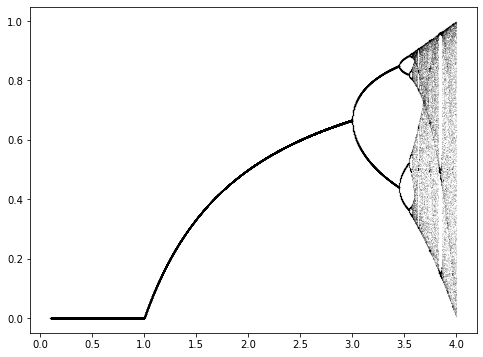

In [204]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(np.repeat(r_space[:, None], 50, axis=1), popmap, 
    s = 0.005, c = "black", alpha=0.5)